In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [86]:
df1 = pd.read_csv(r"D:\CampMain\DSMP 1.0\2) Python\3) Data analysis Process\Data Analysis Projects\01 Titanic\train.csv")
df2 = pd.read_csv(r"D:\CampMain\DSMP 1.0\2) Python\3) Data analysis Process\Data Analysis Projects\01 Titanic\test.csv")

df = pd.concat([df1,df2])
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
data = df.copy()

### 1. Write a summary for your data
- This data set has 1309 rows and 12 columns. The first 6 columns are passenger ID, survived, pclass, name, sex, age. The last 6 columns are SibSp, Parch, Ticket, Fare, Cabin, Embarked.

- Data about passengers who survived and died.


### 2. Write Column descriptions

#### **Table** ->

- **PassengerId:** Unique identifier for each passenger.
- **Survived:** Whether the passenger survived or not.
- **Pclass:** Passenger class. 1st = 1, 2nd = 2, 3rd = 3.
- **Name:** Name of the passenger.
- **Sex:** Gender of the passenger.
- **Age:** Age of the passenger.
- **SibSp:** Number of siblings and spouses on board.
- **Parch:** Number of parents and children on board.
- **Ticket:** Ticket number of the passenger.
- **Fare:** Fare paid by the passenger.
- **Cabin:** Cabin number of the passenger.
- **Embarked:** Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Issues with the dataset

1. **Dirty Data**
    - Survived: Missing values `completness`
    - Age: Missing values `completness`
    - Fare: Create Individual Feare `Validity` and Missing values `completness`
    - Cabin: Lopts of Missing values we can drop `completness`
    - Embarked: Missing values `completness`


2. **Messy Data**
    - Name
    - Ticket

### Data Cleaning Order

1. Quality -> Completeness
2. Tidiness (messy data)
3. Quality -> Validity
4. Quality -> Accuracy
5. Quality -> Consistency

## Completeness

In [4]:
# CCA applied
new_df = df.dropna()
df.shape, new_df.shape

((1309, 12), (183, 12))

In [5]:
len(new_df) / len(df)

0.13980137509549273

<Axes: >

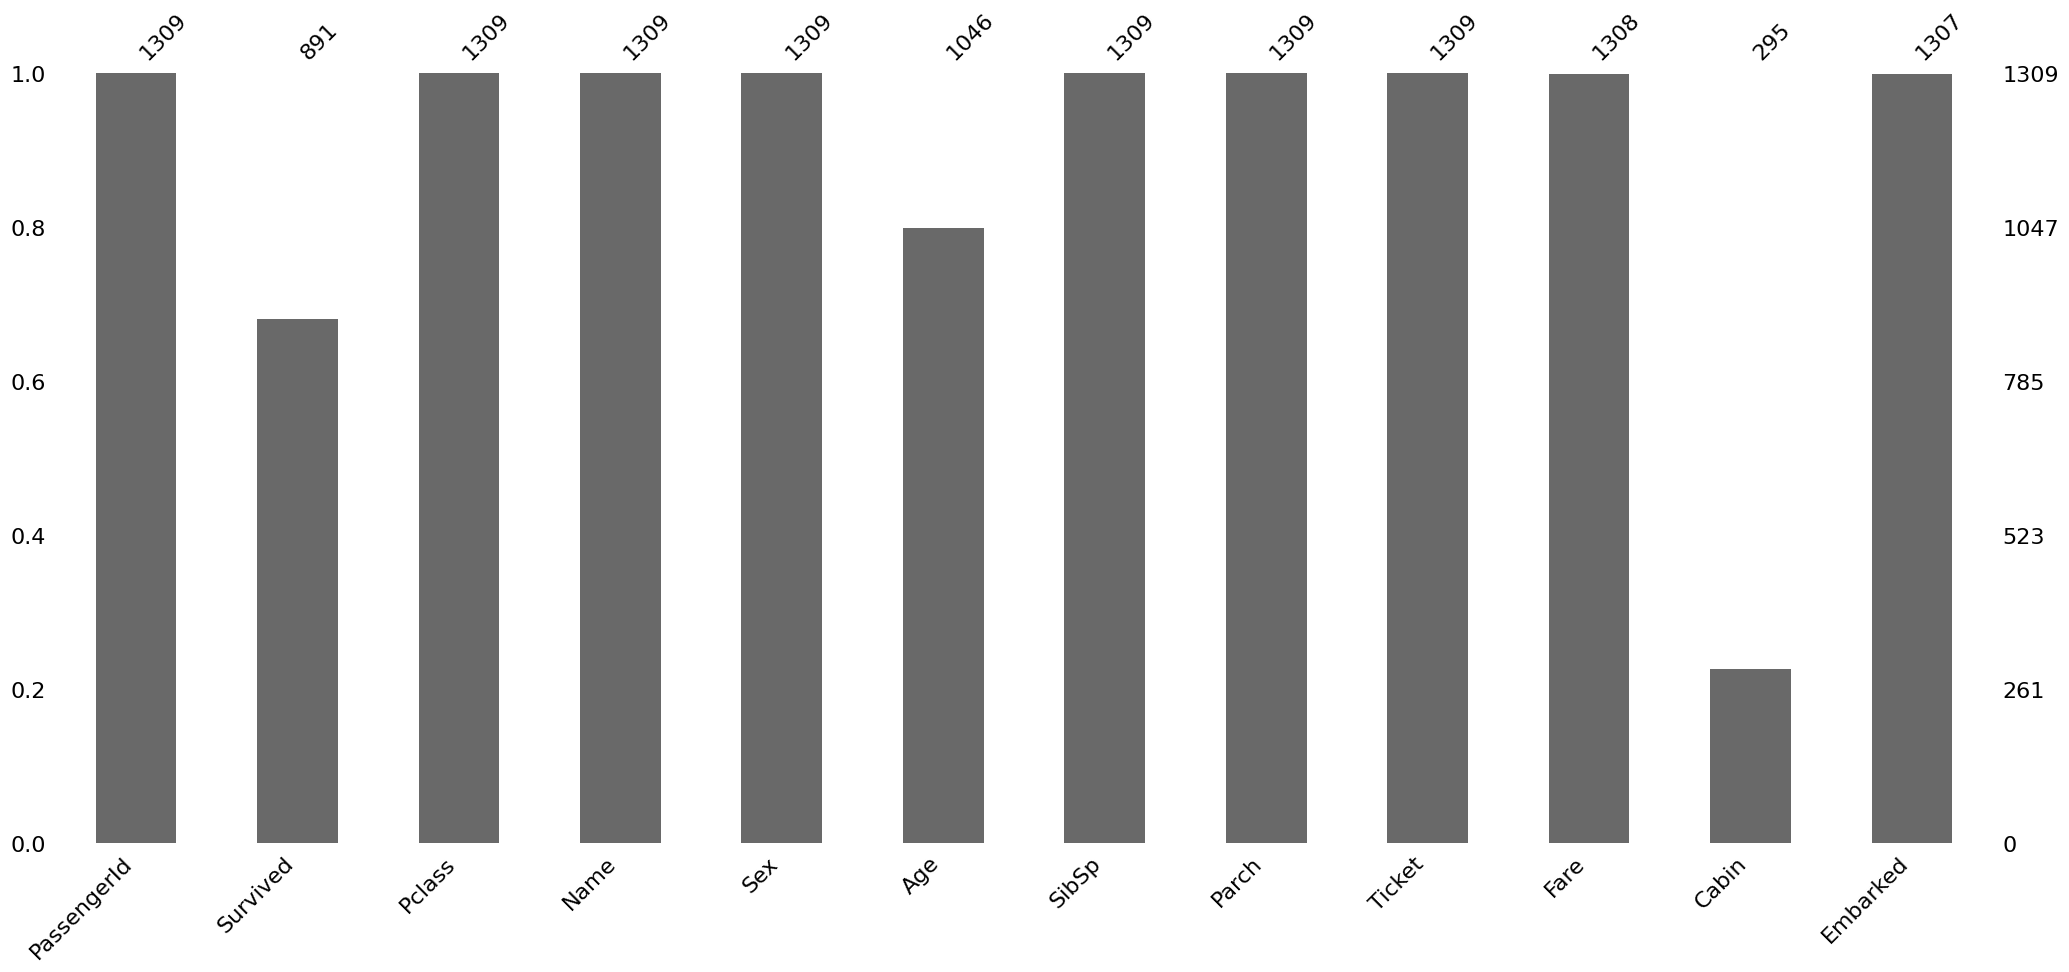

In [5]:
# Bar plot to visualize missing values
msno.bar(df)

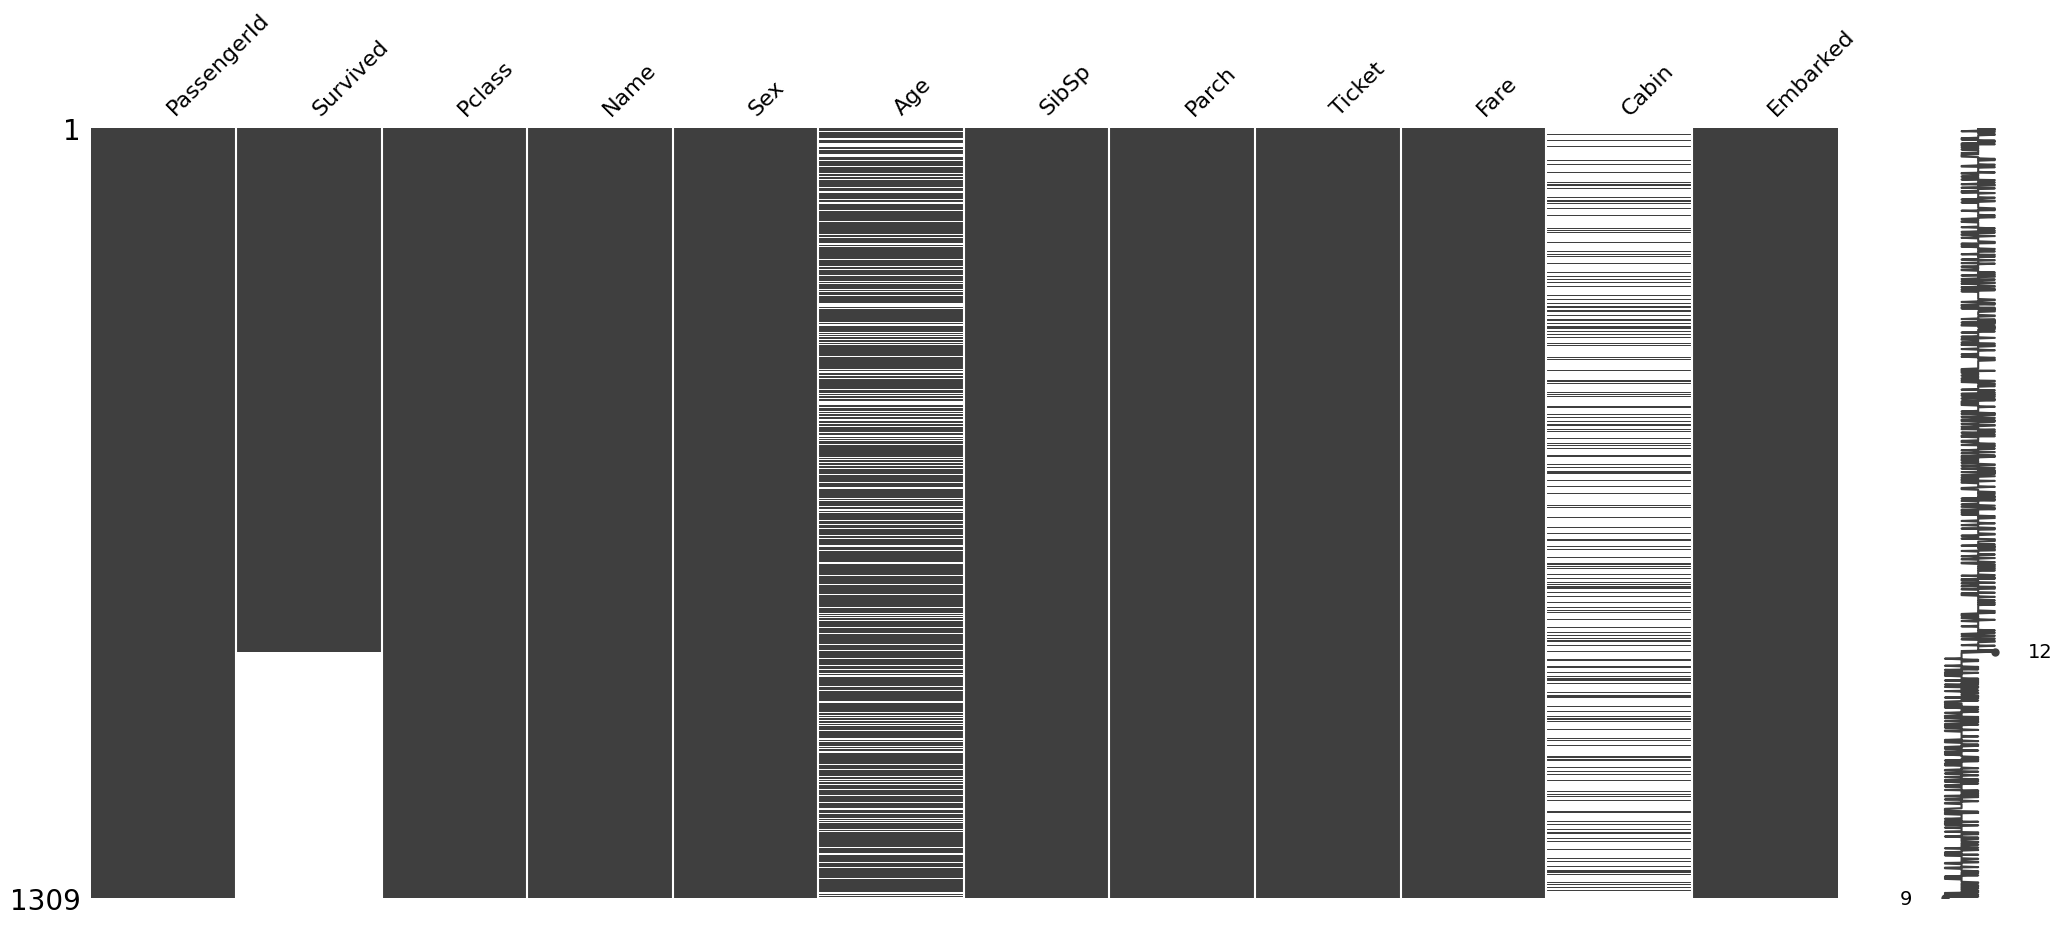

In [9]:
# Matrix chart to visualize missing values
msno.matrix(df)
plt.show()

In [10]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [43]:
df = df[~df['Fare'].isnull()]

In [44]:
df['Fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

- The reason behind missing survived is because those are test data.
- We can drop them.

In [45]:
df = df[~df['Survived'].isnull()]

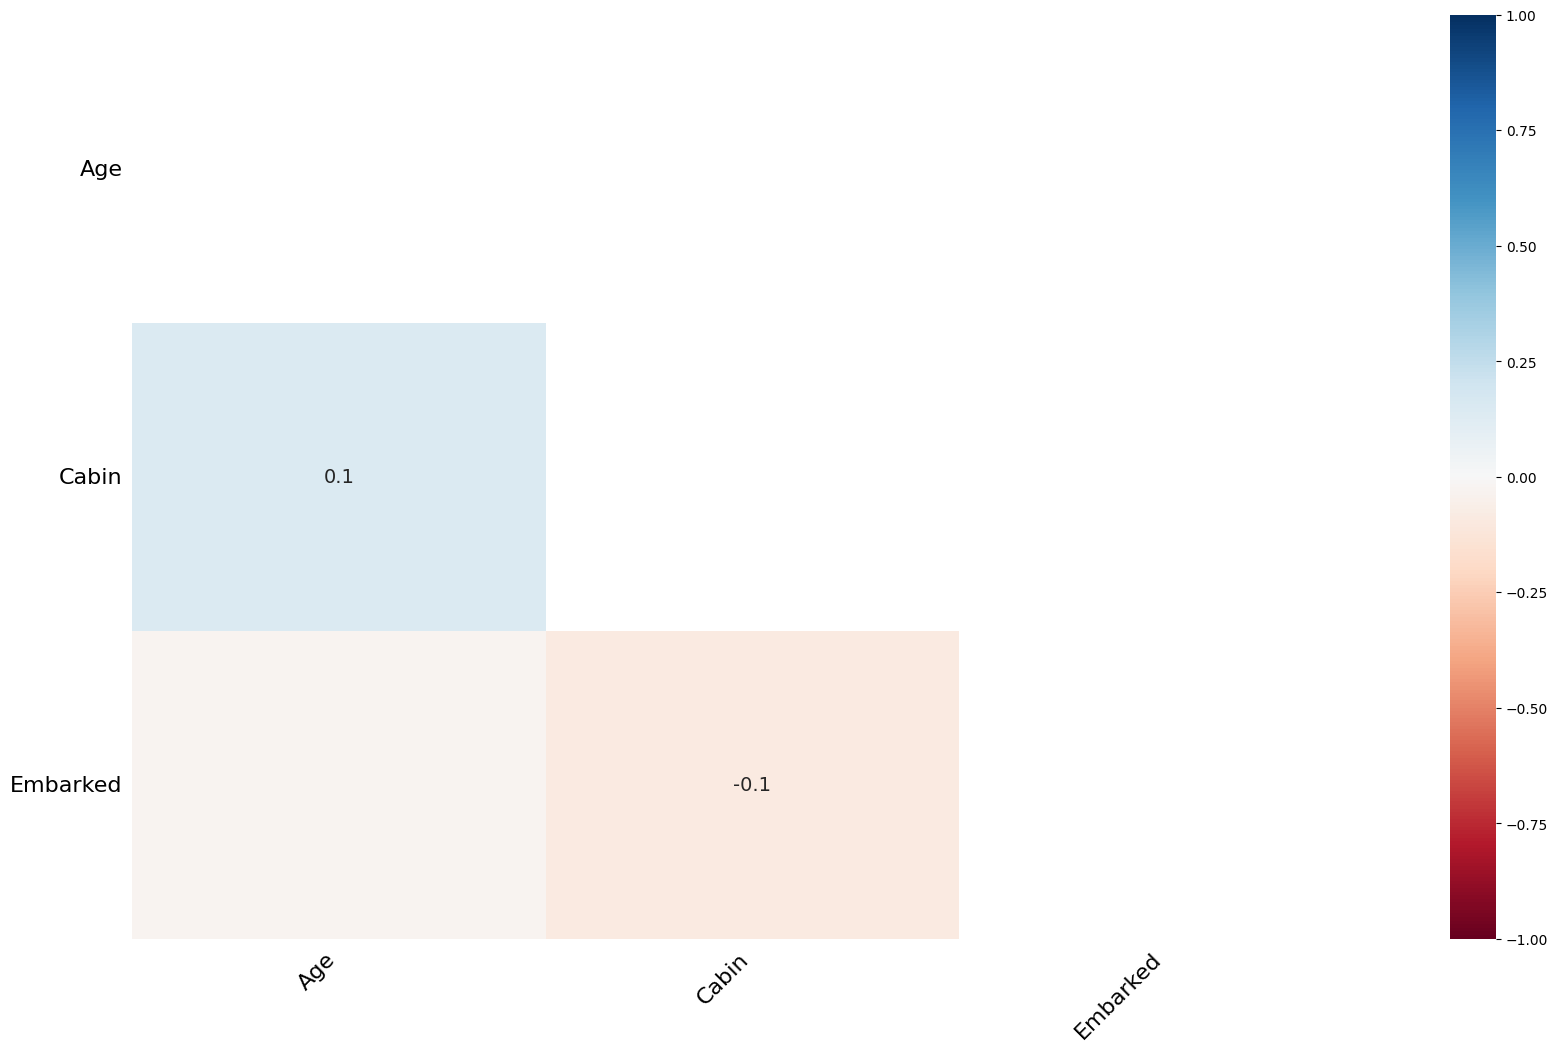

In [18]:
msno.heatmap(df)
plt.show()

In [9]:
def check_missing(df):
    X = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).reset_index().rename(columns={'index':'feature',0:'missing_percentage'})
    return X[X['missing_percentage']>0]

In [10]:
check_missing(df)

,feature,missing_percentage
0,Cabin,77.104377
1,Age,19.865320
2,Embarked,0.224467


##  Removing Missing Data

- Drop the cabin column because 77% of the data is missing (>50%)
- The rest Age & Emabarked columns are <50% missing, so we can't remove them.

In [46]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
check_missing(df)

,feature,missing_percentage
0,Age,19.865320
1,Embarked,0.224467


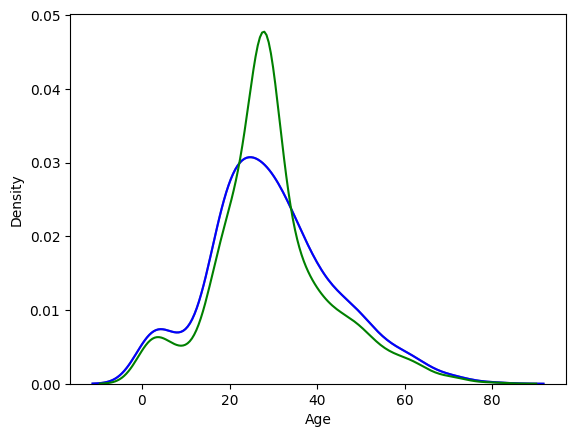

In [19]:
X = df['Age']
sns.kdeplot(X, color='black', alpha=0.5)

_X = df['Age'].dropna()
sns.kdeplot(_X, color='b')

X_median = df['Age'].fillna(df['Age'].mean())
sns.kdeplot(X_median, color='g')

plt.show()

- The reason for missing values in Age column may be due to MCAR (Missing Completely at Random).
- That's why after dropping null value still it maintain the distribution

In [50]:
df1 = df.drop(['Name','Ticket'],axis=1)
df1.dropna(inplace=True)
# df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])
# df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [51]:
df1 = pd.get_dummies(df1,drop_first=True)
df1['Sex_male'] = df1['Sex_male'].astype(int)
df1['Embarked_S'] = df1['Embarked_S'].astype(int)
df1['Embarked_Q'] = df1['Embarked_Q'].astype(int)
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,3.62500,1,0,1
1,2,1.0,1,38.0,1,0,35.64165,0,0,0
2,3,1.0,3,26.0,0,0,7.92500,0,0,1
3,4,1.0,1,35.0,1,0,26.55000,0,0,1
4,5,0.0,3,35.0,0,0,8.05000,1,0,1


In [52]:
# use standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['Age','Fare']] = scaler.fit_transform(df1[['Age','Fare']])

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

In [89]:
df1 = df.copy()
df1.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,3.62500,S
1,1.0,1,female,38.0,1,0,35.64165,C
2,1.0,3,female,26.0,0,0,7.92500,S
3,1.0,1,female,35.0,1,0,26.55000,S
4,0.0,3,male,35.0,0,0,8.05000,S


In [95]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='median')),
 ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='most_frequent')),
 ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
     transformers=[
     ('num', numerical_transformer, numerical_features),
     ('cat', categorical_transformer, categorical_features)
     ]
)

clf = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('classifier', LogisticRegression(n_jobs=-1))
])

param_grid = {
     'preprocessor__num__imputer__strategy': ['mean', 'median'],
     'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
     'classifier__C': [0.1, 1.0, 10, 100]
}
grid_search = GridSearchCV(clf, param_grid, cv=10)


In [96]:
X = df1.drop('Survived', axis=1)
y = df1['Survived'].values
grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Embarked',
                                                                          'Sex'])])),
                                       ('classifier',
                                        LogisticRegression(n_jobs=-1))]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                  'constant'],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

In [98]:
import pandas as pd
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]


,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
0,0.1,most_frequent,mean,0.781111
1,0.1,most_frequent,median,0.781111
2,0.1,constant,mean,0.781111
3,0.1,constant,median,0.781111
4,1.0,most_frequent,mean,0.779988
5,1.0,most_frequent,median,0.779988
6,1.0,constant,mean,0.779988
7,1.0,constant,median,0.779988
8,10,most_frequent,mean,0.779988
9,10,most_frequent,median,0.779988


In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error

def evaluate_model_multiple_states(X, y, n_splits=10, n_runs=10):
    all_metrics = []

    for run in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)
        metrics = []

        for split_index, (train_index, test_index) in enumerate(kf.split(X)):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            LR = LogisticRegression(n_jobs=-1)
            LR.fit(X_train, y_train)
            y_pred = LR.predict(X_test)

            n = len(X_test)
            SSE = np.sum((y_test - y_pred) ** 2)
            if n > 2:
                SE = np.sqrt(SSE / (n - 2))
            else:
                SE = np.inf  # Set SE to infinity if n <= 2 to avoid division by zero

            MAE = np.mean(np.abs(y_test - y_pred))
            MSE = np.mean((y_test - y_pred) ** 2)
            RMSE = np.sqrt(MSE)
            R2 = r2_score(y_test, y_pred)
            if n > 2:
                R2adj = 1 - ((1 - R2) * (n - 1) / (n - 2))
            else:
                R2adj = -np.inf  # Set R2adj to negative infinity if n <= 2 to indicate an invalid value

            metrics.append({
                'run': run,
                'split_index': split_index,
                'train_index': train_index.tolist(),  # Store indices as lists
                'test_index': test_index.tolist(),    # Store indices as lists 
                'SSE': SSE,
                'SE': SE,
                'MAE': MAE,
                'MSE': MSE,
                'RMSE': RMSE,
                'accuracy': accuracy_score(y_test, y_pred),
                'R2': R2,
                'R2adj': R2adj,
                'Diffence': R2 - R2adj
            })

        all_metrics.extend(metrics)

    all_metrics_df = pd.DataFrame(all_metrics)

    return all_metrics_df

In [49]:
df1 = df.copy()
df1.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,3.62500,S
1,1.0,1,female,38.0,1,0,35.64165,C
2,1.0,3,female,26.0,0,0,7.92500,S
3,1.0,1,female,35.0,1,0,26.55000,S
4,0.0,3,male,35.0,0,0,8.05000,S


In [50]:
df1.dropna(subset=['Age','Embarked'],inplace=True)

In [51]:
# Example usage
df1 = pd.get_dummies(df1,drop_first=True)
X = df1.drop('Survived', axis=1).values
y = df1['Survived'].values

In [53]:
metrics_df_multiple = evaluate_model_multiple_states(X, y, n_splits=20, n_runs=1000)
best_splits_multiple = metrics_df_multiple.sort_values(by='Diffence', ascending=True)
best_splits_multiple.head(3)

,run,split_index,train_index,test_index,SSE,SE,MAE,MSE,RMSE,accuracy,R2,R2adj,Diffence
15482,774,2,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 15, 63, 94, 100, 113, 119, 169, 171, 220, ...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7888,394,8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14, 27, 45, 66, 75, 102, 136, 150, 184, 193, ...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7141,357,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[33, 40, 53, 55, 60, 63, 115, 118, 149, 183, 2...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [85]:
best_splits_multiple.shape

(20000, 13)

In [71]:
kf = KFold(n_splits=20, shuffle=True, random_state=774)

Index = []
for split_index, (train_index, test_index) in enumerate(kf.split(X)):
    Dict = {
        'split_index': split_index,
        'train_index': train_index.tolist(),
        'test_index': test_index.tolist()
    }
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    LR = LogisticRegression(n_jobs=-1)
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)

    accuarcy = accuracy_score(y_test, y_pred)
    Dict = {
        'split_index': split_index,
        'train_index': train_index.tolist(),
        'test_index': test_index.tolist(),
        'accuarcy': accuarcy
    }

    Index.append(Dict)


df3 = pd.DataFrame(Index)

In [72]:
train_index = df3.sort_values(by='accuarcy', ascending=False).head(1).values[0][1]
test_index = df3.sort_values(by='accuarcy', ascending=False).head(1).values[0][2]
LR = LogisticRegression(n_jobs=-1)
LR.fit(X[train_index], y[train_index])

LogisticRegression(n_jobs=-1)

In [73]:
y_pred = LR.predict(X[test_index])
R2 = r2_score(y[test_index], y_pred)
print(R2)
n = len(X[test_index])
R2adj = 1 - ((1 - R2) * (n - 1) / (n - 2))
print(R2adj)
print(accuracy_score(y[test_index], y_pred))

1.0
1.0
1.0


In [55]:
df2 = pd.read_csv(r"D:\CampMain\DSMP 1.0\2) Python\3) Data analysis Process\Data Analysis Projects\01 Titanic\test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
df2.drop(columns=['Name','PassengerId','Ticket','Cabin'],inplace=True)
df2.dropna(inplace=True)
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [75]:
test = df2.values
df2['Survived'] = LR.predict(test)

In [76]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,34.5,0,0,7.8292,True,True,False,0.0
1,3,47.0,1,0,7.0000,False,False,True,0.0
2,2,62.0,0,0,9.6875,True,True,False,0.0
3,3,27.0,0,0,8.6625,True,False,True,0.0
4,3,22.0,1,1,12.2875,False,False,True,1.0


In [88]:
data.drop(columns=['Cabin'],inplace=True)
data.dropna(inplace=True)

In [89]:
import pickle

with open('Titanic.pkl', 'wb') as f:
    pickle.dump(data, f)